In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("D:/junotbok/6th week/car_prices_dataset.csv")

In [3]:
df

,Make,Model,Year,Mileage,Engine Size (L),Fuel Type,Transmission,Horsepower,Number of Doors,Price ($)
0,Chevrolet,Cruze,2005,41531,3.3,Diesel,Automatic,272,2,5502.62
1,Honda,Accord,2019,129606,1.1,Diesel,Manual,208,4,11718.97
2,Honda,CR-V,2018,95481,3.7,Diesel,Automatic,425,2,16061.98
3,Audi,A6,2021,122983,2.0,Electric,Automatic,261,2,27599.81
4,Mercedes,GLA,2019,105776,2.5,Electric,Automatic,113,4,37560.61
...,...,...,...,...,...,...,...,...,...,...
95,Toyota,Camry,2018,147376,3.9,Electric,Automatic,202,2,11436.81
96,Audi,Q5,2017,82076,3.7,Hybrid,Automatic,397,2,29303.98
97,Mercedes,C-Class,2020,105246,2.0,Diesel,Automatic,127,2,34469.23
98,Mercedes,C-Class,2019,32734,1.2,Diesel,Automatic,293,2,35586.35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             100 non-null    object 
 1   Model            100 non-null    object 
 2   Year             100 non-null    int64  
 3   Mileage          100 non-null    int64  
 4   Engine Size (L)  100 non-null    float64
 5   Fuel Type        100 non-null    object 
 6   Transmission     100 non-null    object 
 7   Horsepower       100 non-null    int64  
 8   Number of Doors  100 non-null    int64  
 9   Price ($)        100 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


In [5]:
df.describe()

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($)
count,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,2014.580000,101506.26000,3.017000,250.590000,2.84000,16586.673600
std,5.658961,59783.75993,1.102802,110.672791,0.99209,9482.073369
min,2005.000000,6858.00000,1.000000,77.000000,2.00000,5000.000000
25%,2010.750000,43154.75000,2.000000,138.750000,2.00000,9439.452500
50%,2015.000000,108314.00000,2.950000,236.000000,2.00000,14497.045000
75%,2019.000000,151525.00000,3.900000,348.500000,4.00000,21331.452500
max,2023.000000,199515.00000,5.000000,450.000000,4.00000,41117.920000


In [6]:
df.shape

(100, 10)

In [7]:
X = df.drop(['Price ($)'], axis=1)
y = df['Price ($)']

In [8]:
X.shape

(100, 9)

In [9]:
y.shape

(100,)

In [10]:
X = pd.get_dummies(X, columns=['Make', 'Model', 'Fuel Type', 'Transmission'])
X = X.astype({column: int for column in X.select_dtypes(include=['bool']).columns})

In [11]:
X

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Make_Audi,Make_BMW,Make_Chevrolet,Make_Ford,Make_Honda,...,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2005,41531,3.3,272,2,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2019,129606,1.1,208,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,2018,95481,3.7,425,2,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,2021,122983,2.0,261,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2019,105776,2.5,113,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018,147376,3.9,202,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
96,2017,82076,3.7,397,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
97,2020,105246,2.0,127,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
98,2019,32734,1.2,293,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
corr_matrix = X_train.corr()
print(corr_matrix)

                            Year   Mileage  Engine Size (L)  Horsepower  \
Year                    1.000000  0.145431        -0.108826   -0.104659   
Mileage                 0.145431  1.000000        -0.149620   -0.058953   
Engine Size (L)        -0.108826 -0.149620         1.000000   -0.088334   
Horsepower             -0.104659 -0.058953        -0.088334    1.000000   
Number of Doors        -0.108548  0.037101        -0.139572    0.003366   
Make_Audi               0.039533 -0.156670        -0.221181    0.121296   
Make_BMW               -0.075040  0.310000        -0.020526    0.036763   
Make_Chevrolet          0.055036  0.059427         0.112951    0.024497   
Make_Ford               0.152057 -0.006157        -0.153607    0.165314   
Make_Honda              0.008527  0.038074         0.069369   -0.004542   
Make_Hyundai            0.070251 -0.141941         0.043605   -0.037721   
Make_Kia               -0.216268  0.024426         0.171061   -0.190693   
Make_Mercedes           0

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

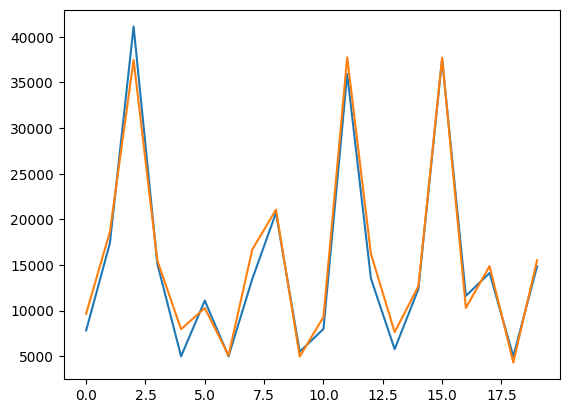

In [17]:
plt.plot(range(0,len(y_test)),y_test)
plt.plot(range(0,len(y_test)),y_pred)
plt.show()

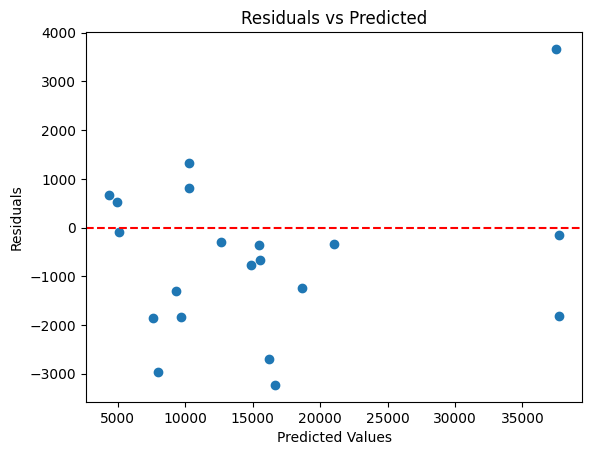

In [18]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [19]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

print('Coefficients:')
print(model.coef_)

Mean Squared Error: 2894868.17
R-squared: 0.97
Coefficients:
[ 8.07356044e+02 -3.39347500e-02  1.57040677e+03 -3.00694898e-01
 -3.53760948e+01  5.47857633e+03  8.46664253e+03 -3.62457492e+03
 -1.96541848e+03 -3.43771424e+03 -4.87283414e+03 -5.71329960e+03
  1.26439579e+04 -5.46254050e+03 -1.51279491e+03  7.24800514e+02
  4.18298302e+03  8.00451489e+02  2.98871790e+03 -5.02513395e+02
  3.61796324e+03 -9.15155930e+02 -2.20746381e+03 -2.02004491e+03
 -1.77998575e+03 -2.46266209e+03  3.04313041e+03 -8.66704102e+02
 -1.71905168e+03 -1.22445164e+03 -5.93283977e+02 -1.47682861e+02
  5.98286426e+03 -4.84058111e+02  5.57138837e+02 -3.41409185e+03
 -5.03041615e+02  1.68940695e+03 -1.47509093e+03 -2.98461620e+03
 -1.93129783e+02 -2.10607796e+03 -5.25695182e+02 -1.02151384e+03
  3.55885899e+03 -4.74913381e+02 -2.96104228e+02  4.36710863e+02
  3.34306746e+02  1.04744379e+02 -1.04744379e+02]


Mean Squared Error (MSE): 2894868.17

The MSE is a measure of the average squared difference between the predicted and actual values. In this case, the MSE is approximately 2.9 million. This value indicates that the model is not very accurate in predicting the prices of cars. A lower MSE would be desirable.

R-squared: 0.97

The R-squared value, also known as the coefficient of determination, measures how well the model explains the variance in the target variable (Price). A value of 0.97 indicates that the model explains about 97% of the variance in the Price variable. This is a relatively high value, suggesting that the model is doing a good job of capturing the relationships between the features and the target variable.

The coefficients for the categorical variables (Make, Model, Fuel Type, Transmission) are relatively small, suggesting that these variables have a smaller impact on Price compared to the numerical variables.
The coefficients for the numerical variables (Year, Mileage, Engine Size, Horsepower, Number of Doors) are generally larger, indicating that these variables have a more significant impact on Price.

Number of Doors has a weak correlation with the Price.
"Fuel Type" and "Transmission" have weak correlations with the Price.
Engine Size L and Horsepower have a moderate correlation with the Price. 
Year and Mileage have a strong correlation with the Price. 